<a href="https://colab.research.google.com/github/choi-yh/DataMining/blob/master/6_5_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [0]:
# Data load
fashion_mnist = datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train[0].shape, y_train[0].shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(28, 28) ()


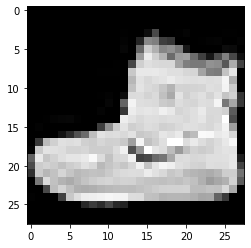

img_label:  9


In [0]:
# check
one_img = x_train[0]
plt.imshow(one_img, cmap='gray')
plt.show()

img_label = y_train[0]
print('img_label: ', img_label)

In [0]:
# data normalization and one-hot encoding
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [0]:
# modeling
model = models.Sequential()

# Convolutional and Max Pooling
model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, (2, 2), padding='same', activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())

# Fully Connected
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_onehot, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 5s 9ms/step - loss: 0.4773 - accuracy: 0.8292
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3120 - accuracy: 0.8884
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2675 - accuracy: 0.9029
Epoch 4/5
600/600 [==============================] - 5s 9ms/step - loss: 0.2391 - accuracy: 0.9124
Epoch 5/5
600/600 [==============================] - 5s 9ms/step - loss: 0.2175 - accuracy: 0.9205


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test_onehot, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.2681 - accuracy: 0.9024
0.902400016784668
